In [90]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn import svm

from sklearn.svm import SVC

from dmba import classificationSummary, gainsChart

import matplotlib.pyplot as plt


In [91]:
data = pd.read_csv('studentperformancefactors.csv')

In [92]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [93]:
#Exploring the data (columns and rows)

print('Number of Rows and Columns:  \n', data.shape)
print('All Variables: \n', data.columns)
print ('\nUnique values :  \n',data.nunique())

Number of Rows and Columns:  
 (6607, 20)
All Variables: 
 Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

Unique values :  
 Hours_Studied                 41
Attendance                    41
Parental_Involvement           3
Access_to_Resources            3
Extracurricular_Activities     2
Sleep_Hours                    7
Previous_Scores               51
Motivation_Level               3
Internet_Access                2
Tutoring_Sessions              9
Family_Income                  3
Teacher_Quality                3
School_Type                    2
Peer_Influence               

In [94]:
#Missing Values
missing_values = data.isnull().sum()
print('Missing Values:\n', missing_values)

#Count, Mean, Standard Deviation, Minimum, Q1, Q3, Median, Max
data.describe()

#Replacing missing values with mode
#Teacher_Quality
mode_value = data['Teacher_Quality'].mode()[0]  

data['Teacher_Quality'] = data['Teacher_Quality'].fillna(mode_value)



#Replacing missing values with mode
#Parental_Education_Level

mode_value = data['Parental_Education_Level'].mode()[0] 

data['Parental_Education_Level'] = data['Parental_Education_Level'].fillna(mode_value)



#Replacing missing values with mode
#Distance_from_Home

mode_value = data['Distance_from_Home'].mode()[0] 

data['Distance_from_Home'] = data['Distance_from_Home'].fillna(mode_value)

print(mode_value)

Missing Values:
 Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64
Near


In [95]:
#Frequency Counts (Categorical Variable)
ParentalInvolvement_count = data['Parental_Involvement'].value_counts()
print('Frequency Count for Parental Involvement:\n', ParentalInvolvement_count)

ResourceAccess = data['Access_to_Resources'].value_counts()
print('\nFrequency Count for Access_to_Resources:\n', ResourceAccess)

Extracurricular_Activities_count = data['Extracurricular_Activities'].value_counts()
print('\nFrequency Count for Extracurricular_Activities:\n', Extracurricular_Activities_count)

Motivation_Level_count = data['Motivation_Level'].value_counts()
print('\nFrequency Count for Motivation_Level:\n', Motivation_Level_count)

Internet_Access_count = data['Internet_Access'].value_counts()
print('\nFrequency Count for Internet_Access:\n', Internet_Access_count)

Family_Income_count = data['Family_Income'].value_counts()
print('\nFrequency Count for Family_Income:\n', Family_Income_count)

Teacher_Quality_count = data['Teacher_Quality'].value_counts()
print('\nFrequency Count for Teacher_Quality:\n', Teacher_Quality_count)

School_Type_count = data['School_Type'].value_counts()
print('\nFrequency Count for School_Type:\n', School_Type_count)

Peer_Influence_count = data['Peer_Influence'].value_counts()
print('\nFrequency Count for Peer_Influence:\n', Peer_Influence_count)

Learning_Disabilities_count = data['Learning_Disabilities'].value_counts()
print('\nFrequency Count for Learning_Disabilities:\n', Learning_Disabilities_count)

Parental_Education_Level_count = data['Parental_Education_Level'].value_counts()
print('\nFrequency Count for Parental_Education_Level:\n', Parental_Education_Level_count)

Distance_from_Home_count = data['Distance_from_Home'].value_counts()
print('\nFrequency Count for Distance_from_Home:\n', Distance_from_Home_count)

Gender_count = data['Gender'].value_counts()
print('\nFrequency Count for Gender:\n', Gender_count)

TutoringSess = data['Tutoring_Sessions'].value_counts()
print('\nFrequency Count for Tutoring_Sessions:\n', TutoringSess)

Frequency Count for Parental Involvement:
 Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64

Frequency Count for Access_to_Resources:
 Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64

Frequency Count for Extracurricular_Activities:
 Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64

Frequency Count for Motivation_Level:
 Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64

Frequency Count for Internet_Access:
 Internet_Access
Yes    6108
No      499
Name: count, dtype: int64

Frequency Count for Family_Income:
 Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64

Frequency Count for Teacher_Quality:
 Teacher_Quality
Medium    4003
High      1947
Low        657
Name: count, dtype: int64

Frequency Count for School_Type:
 School_Type
Public     4598
Private    2009
Name: count, dtype: int64

Frequency Count f

In [96]:
threshold = 70
data['Exam_Result'] = np.where(data['Exam_Score'] >= threshold, '1', '0')

Exam_count = data['Exam_Result'].value_counts()
print('\nFrequency Count for Exam:\n', Exam_count)


Frequency Count for Exam:
 Exam_Result
0    4982
1    1625
Name: count, dtype: int64


In [97]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [156]:
NewData = data
print('All Variables: \n', NewData2.columns) 


All Variables: 
 Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Result'],
      dtype='object')


In [136]:
Learning_Disabilities_count = NewData['Learning_Disabilities'].value_counts()
print('\nFrequency Count for Learning_Disabilities:\n', Learning_Disabilities_count)

Extracurricular_Activities_count = NewData['Extracurricular_Activities'].value_counts()
print('\nFrequency Count for Extracurricular_Activities:\n', Extracurricular_Activities_count)

School_Type_count = NewData['School_Type'].value_counts()
print('\nFrequency Count for School_Type:\n', School_Type_count)


Frequency Count for Learning_Disabilities:
 Learning_Disabilities
No     5912
Yes     695
Name: count, dtype: int64

Frequency Count for Extracurricular_Activities:
 Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64

Frequency Count for School_Type:
 School_Type
Public     4598
Private    2009
Name: count, dtype: int64


In [138]:
# converting categorical variables to numeric

NewData['Learning_Disabilities_num'] = NewData['Learning_Disabilities'].map({'Yes': 1, 'No': 0})
NewData['Extracurricular_Activities_num'] = NewData['Extracurricular_Activities'].map({'Yes': 1, 'No': 0})
NewData['School_Type_num'] = NewData['School_Type'].map({'Public': 0, 'Private': 1})
NewData['Parental_Involv_num'] = NewData['Parental_Involvement'].map({'Low': 1, 'Medium': 2, 'High':3})
NewData['Access_to_Resources_num'] = NewData['Access_to_Resources'].map({'Low': 1, 'Medium': 2, 'High':3})
NewData['Motivation_Level_num'] = NewData['Motivation_Level'].map({'Low': 1, 'Medium': 2, 'High':3})
NewData['Internet_Access_num'] = NewData['Internet_Access'].map({'No': 0, 'Yes': 1})
NewData['Family_Income_num'] = NewData['Family_Income'].map({'Low': 1, 'Medium': 2, 'High':3})
NewData['Teacher_Quality_num'] = NewData['Teacher_Quality'].map({'Low': 1, 'Medium': 2, 'High':3})
NewData['Peer_Influence_num'] = NewData['Peer_Influence'].map({'Neutral': 1, 'Negative': 0, 'Positive':2})
NewData['Parental_Education_Level_num'] = NewData['Parental_Education_Level'].map({'High School': 1, 'College': 2, 'Postgraduate':3})
NewData['Distance_from_Home_num'] = NewData['Distance_from_Home'].map({'Near': 1, 'Moderate': 2, 'Far':3})
NewData['Gender_Level_num'] = NewData['Gender'].map({'Male': 0, 'Female': 1})



print('\nFrequency Count for Learning_Disabilities_num:\n', NewData['Learning_Disabilities_num'].value_counts(),
      '\nFrequency Count for Extracurricular_Activities_num:\n', NewData['Extracurricular_Activities_num'].value_counts(),
      '\nFrequency Count for School_Type_num:\n', NewData['School_Type_num'].value_counts(),
      '\nFrequency Count for Parental_Involv_num:\n', NewData['Parental_Involv_num'].value_counts(),
      '\nFrequency Count for School_Type_num:\n', NewData['School_Type_num'].value_counts(),
      '\nFrequency Count for Access_to_Resources_num:\n', NewData['Access_to_Resources_num'].value_counts(),
      '\nFrequency Count for Motivation_Level_num:\n', NewData['Motivation_Level_num'].value_counts(),
      '\nFrequency Count for Internet_Access_num:\n', NewData['Internet_Access_num'].value_counts(),
      '\nFrequency Count for Family_Income_num:\n', NewData['Family_Income_num'].value_counts(),
      '\nFrequency Count for Teacher_Quality_num:\n', NewData['Teacher_Quality_num'].value_counts(),      
      '\nFrequency Count for Peer_Influence_num:\n', NewData['Peer_Influence_num'].value_counts(),
      '\nFrequency Count for Parental_Education_Level_num:\n', NewData['Parental_Education_Level_num'].value_counts(),
      '\nFrequency Count for Distance_from_Home_num:\n', NewData['Distance_from_Home_num'].value_counts(),
      '\nFrequency Count for Gender_Level_num:\n', NewData['Gender_Level_num'].value_counts()
     )







Frequency Count for Learning_Disabilities_num:
 Learning_Disabilities_num
0    5912
1     695
Name: count, dtype: int64 
Frequency Count for Extracurricular_Activities_num:
 Extracurricular_Activities_num
1    3938
0    2669
Name: count, dtype: int64 
Frequency Count for School_Type_num:
 School_Type_num
0    4598
1    2009
Name: count, dtype: int64 
Frequency Count for Parental_Involv_num:
 Parental_Involv_num
2    3362
3    1908
1    1337
Name: count, dtype: int64 
Frequency Count for School_Type_num:
 School_Type_num
0    4598
1    2009
Name: count, dtype: int64 
Frequency Count for Access_to_Resources_num:
 Access_to_Resources_num
2    3319
3    1975
1    1313
Name: count, dtype: int64 
Frequency Count for Motivation_Level_num:
 Motivation_Level_num
2    3351
1    1937
3    1319
Name: count, dtype: int64 
Frequency Count for Internet_Access_num:
 Internet_Access_num
1    6108
0     499
Name: count, dtype: int64 
Frequency Count for Family_Income_num:
 Family_Income_num
1    2672
2

In [150]:
NewData1 = NewData[["Exam_Result",
                    "Learning_Disabilities_num",
                    "Extracurricular_Activities_num", 
                    "School_Type_num",
                    "Access_to_Resources_num",
                    "Motivation_Level_num",
                    "Internet_Access_num",
                    "Family_Income_num",
                    "Teacher_Quality_num",
                    "Peer_Influence_num",
                    "Parental_Education_Level_num",
                    "Distance_from_Home_num",
                    "Gender_Level_num",
                    "Parental_Involv_num",
                    "Hours_Studied",
                    "Attendance",
                    "Sleep_Hours",
                    "Previous_Scores",
                    "Tutoring_Sessions",
                    "Physical_Activity",
                    ]]

print('All Variables: \n', NewData.columns) 


All Variables: 
 Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Result', 'Learning_Disabilities_num',
       'Extracurricular_Activities_num', 'School_Type_num',
       'Parental_Involv_num', 'Access_to_Resources_num',
       'Motivation_Level_num', 'Internet_Access_num', 'Family_Income_num',
       'Teacher_Quality_num', 'Peer_Influence_num',
       'Parental_Education_Level_num', 'Distance_from_Home_num',
       'Gender_Level_num'],
      dtype='object')


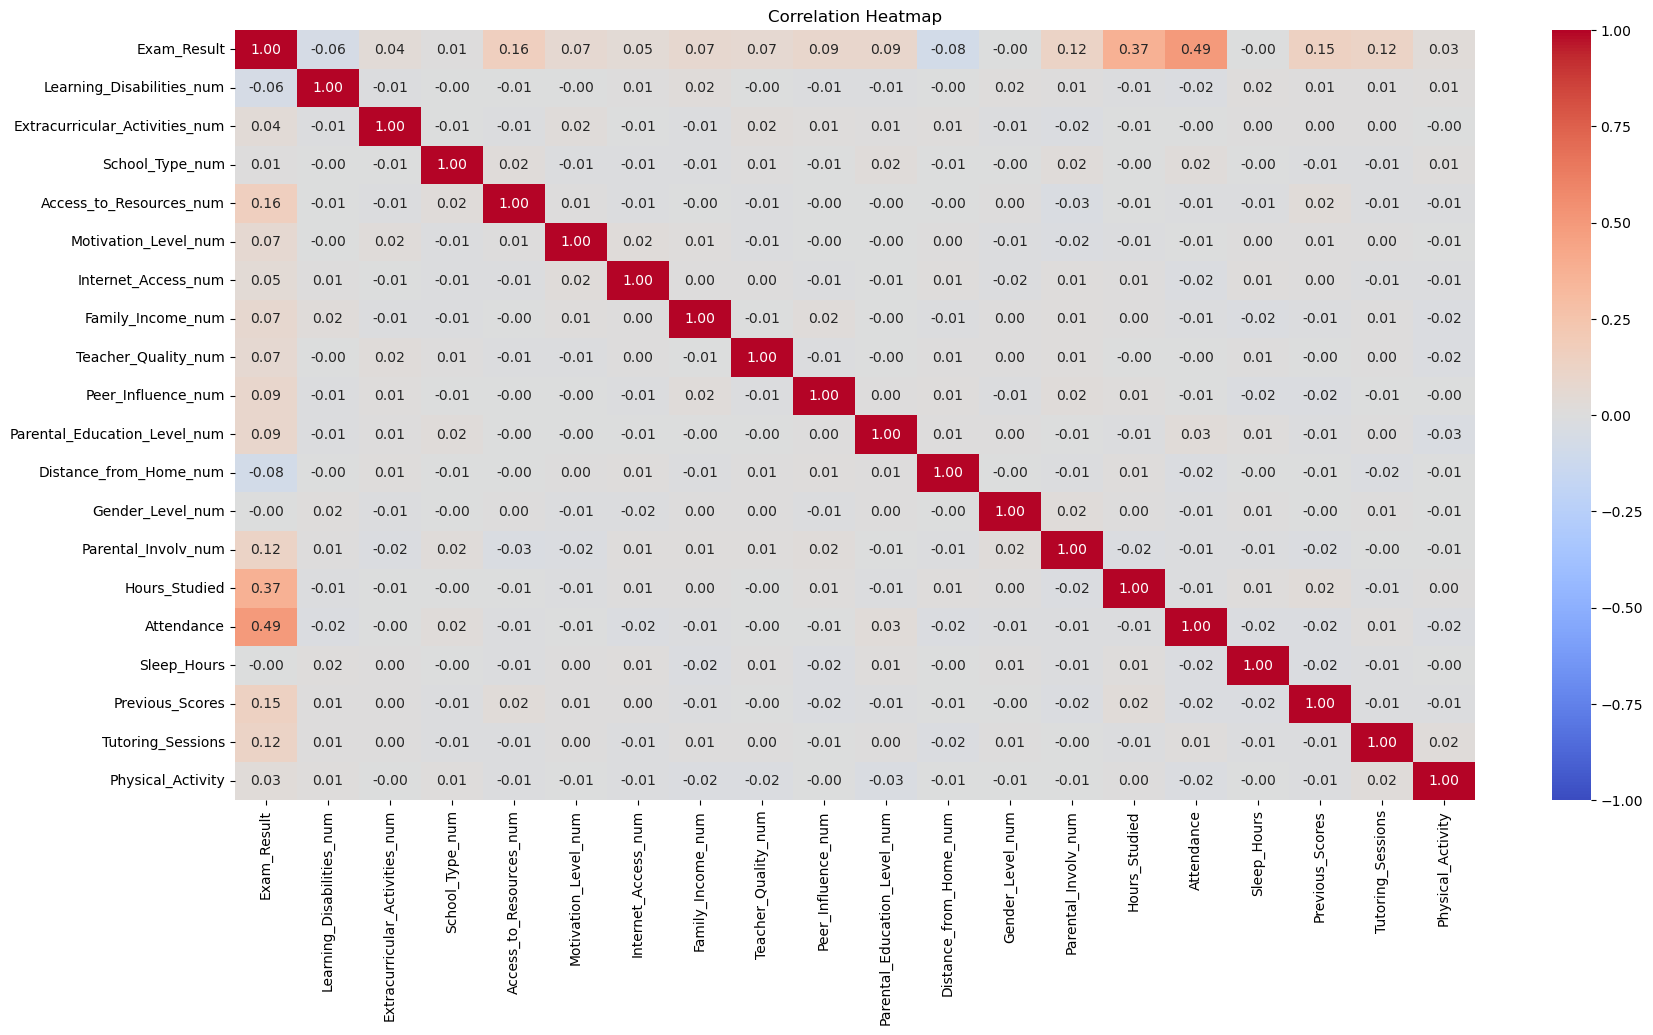

In [102]:
#Heatmap

corr_matrix = NewData1.corr()


plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

# Add title
plt.title('Correlation Heatmap')
plt.show()



Interquartile Range: 4

lower bound outliers: 59.0
upper bound outliers: 75.0

Count of Lower Bound Outliers: 28
Count of Upper Bound Outliers: 76


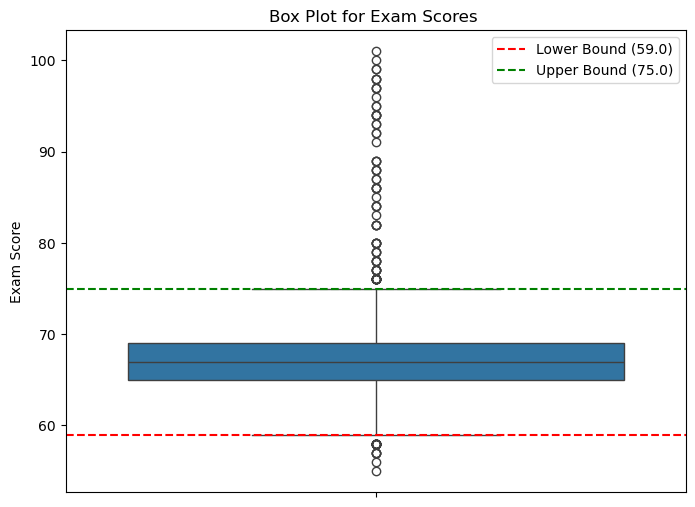

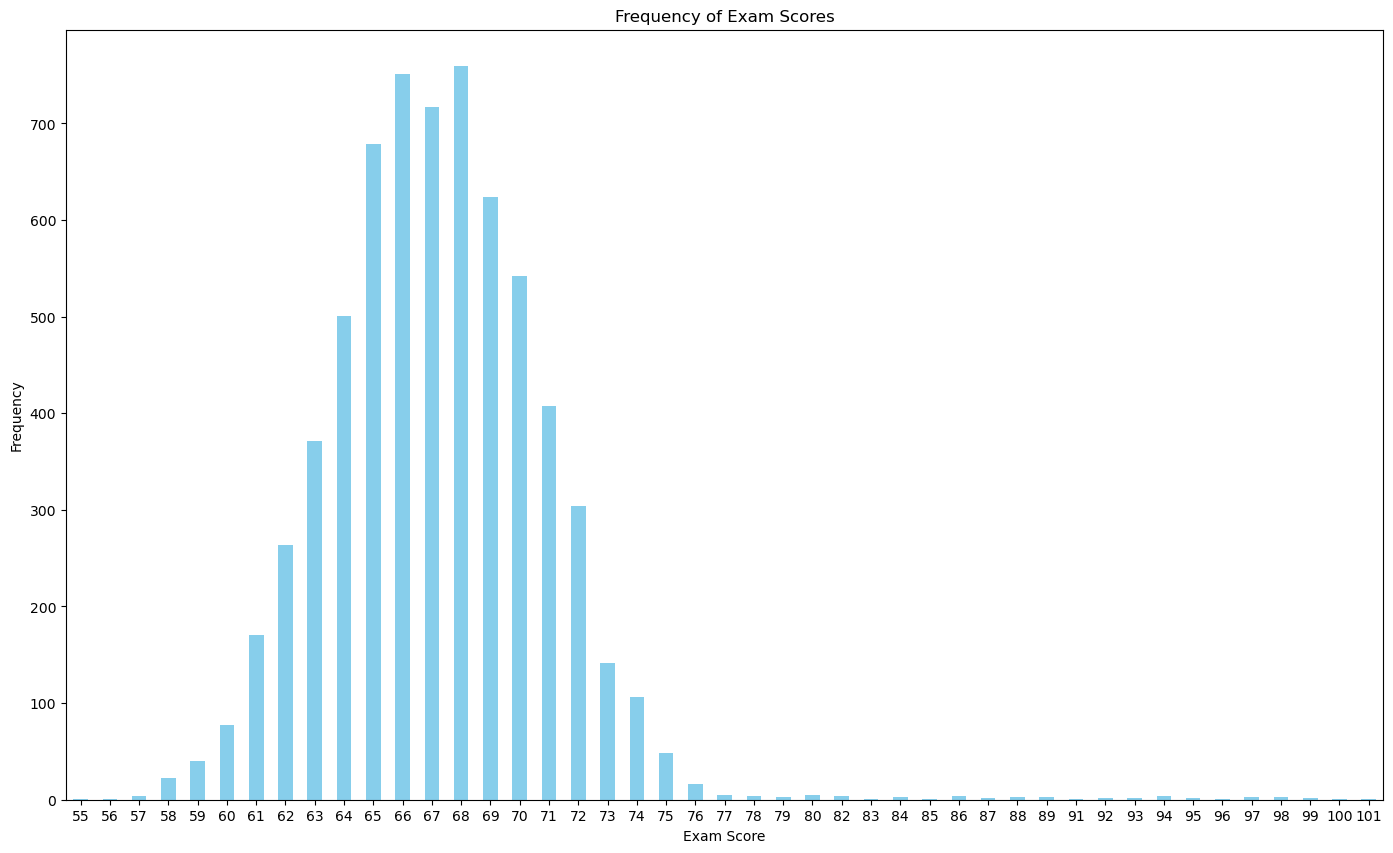

In [158]:
# Outliers

Q1 = 65
Q3 = 69
IQR = Q3 - Q1
print('\nInterquartile Range:', IQR)

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('\nlower bound outliers:', lower_bound)
print('upper bound outliers:', upper_bound)

lowerboundoutliers = NewData[(NewData['Exam_Score'] < lower_bound)]
upperboundoutliers = NewData[(NewData['Exam_Score'] > upper_bound)]

print('\nCount of Lower Bound Outliers:', lowerboundoutliers.shape[0])
print('Count of Upper Bound Outliers:', upperboundoutliers.shape[0])

plt.figure(figsize=(8, 6))
sns.boxplot(y=data['Exam_Score'])
plt.axhline(lower_bound, color='red', linestyle='--', label=f'Lower Bound ({lower_bound})')
plt.axhline(upper_bound, color='green', linestyle='--', label=f'Upper Bound ({upper_bound})')
plt.title("Box Plot for Exam Scores ")
plt.ylabel("Exam Score")
plt.legend()
plt.show()




score_counts = NewData['Exam_Score'].value_counts().sort_index()

plt.figure(figsize=(17, 10))
score_counts.plot(kind='bar', color='skyblue')
plt.title("Frequency of Exam Scores")
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

Originial Data Columns and Rows: (6607, 21)
New Data without Outliers: (6503, 21)


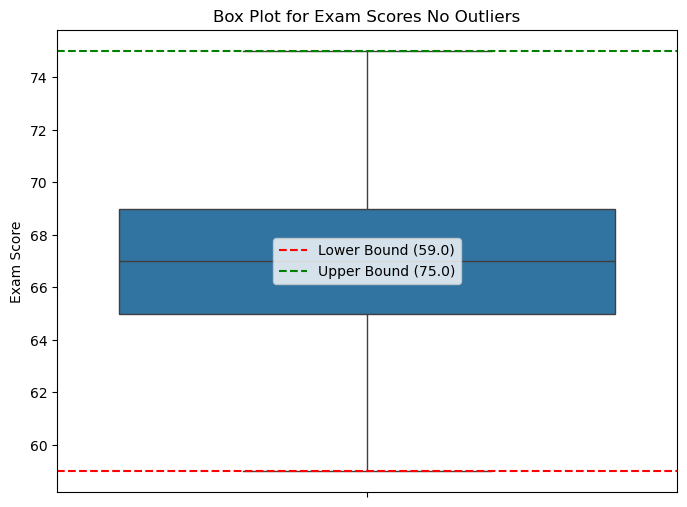

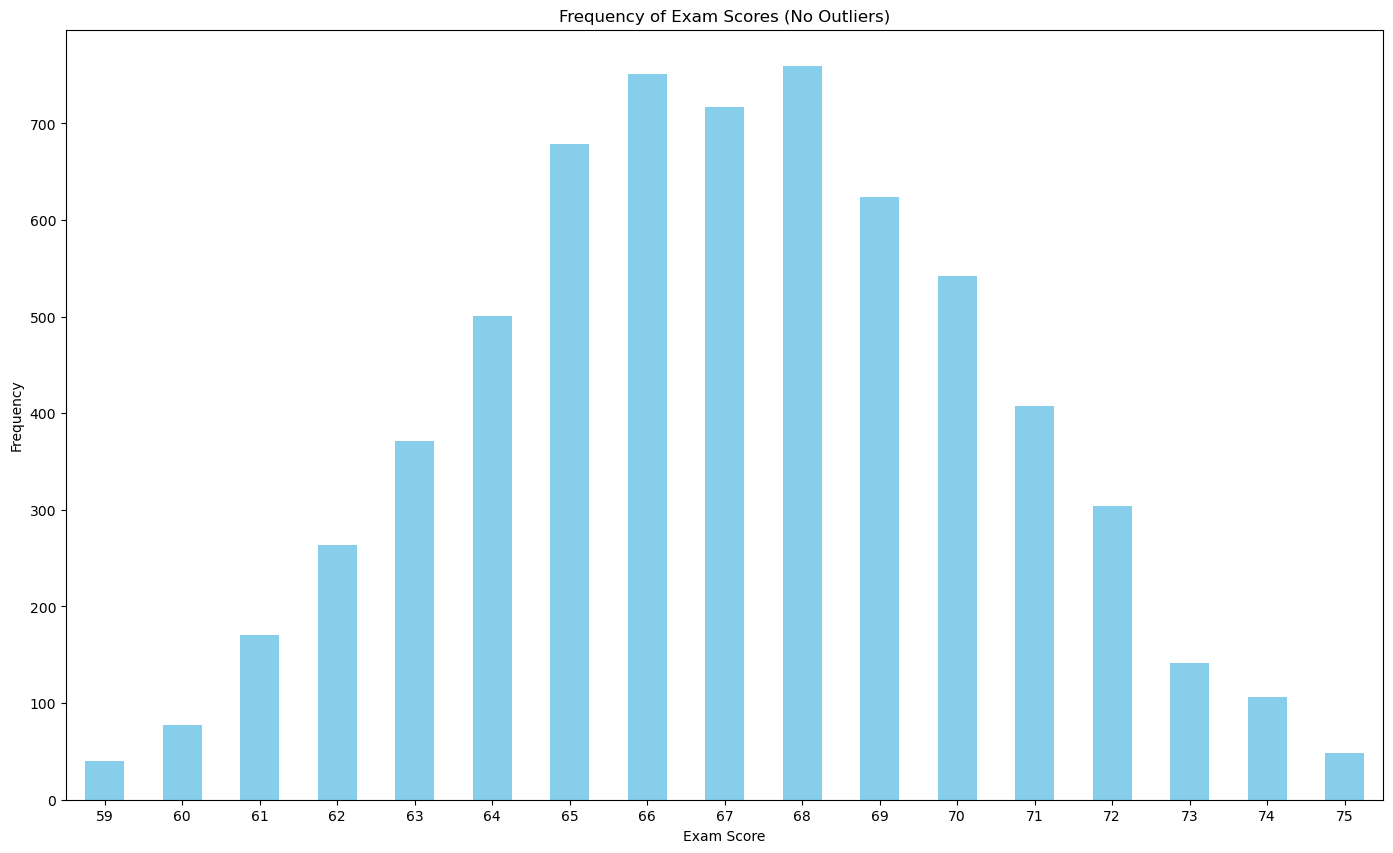

In [160]:
#Removing Outliers

df_no_outliers = NewData[(NewData['Exam_Score'] >= lower_bound) & (NewData['Exam_Score'] <= upper_bound)]



print('Originial Data Columns and Rows:', NewData.shape)

print('New Data without Outliers:',df_no_outliers.shape)


plt.figure(figsize=(8, 6))
sns.boxplot(y=df_no_outliers['Exam_Score'])
plt.axhline(lower_bound, color='red', linestyle='--', label=f'Lower Bound ({lower_bound})')
plt.axhline(upper_bound, color='green', linestyle='--', label=f'Upper Bound ({upper_bound})')
plt.title("Box Plot for Exam Scores No Outliers")
plt.ylabel("Exam Score")
plt.legend()
plt.show()


score_counts1 = df_no_outliers['Exam_Score'].value_counts().sort_index()


plt.figure(figsize=(17, 10))
score_counts1.plot(kind='bar', color='skyblue')
plt.title("Frequency of Exam Scores (No Outliers)")
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()



Interquartile Range: 1

lower bound outliers: -0.5
upper bound outliers: 3.5

Count of Lower Bound Outliers: 0
Count of Upper Bound Outliers: 430


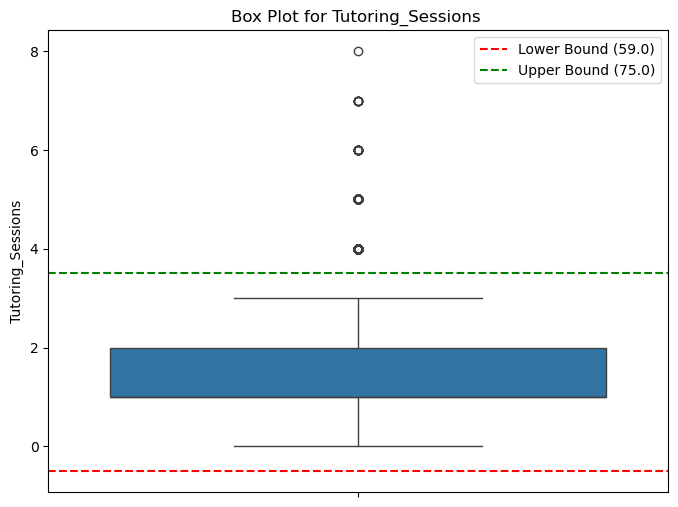

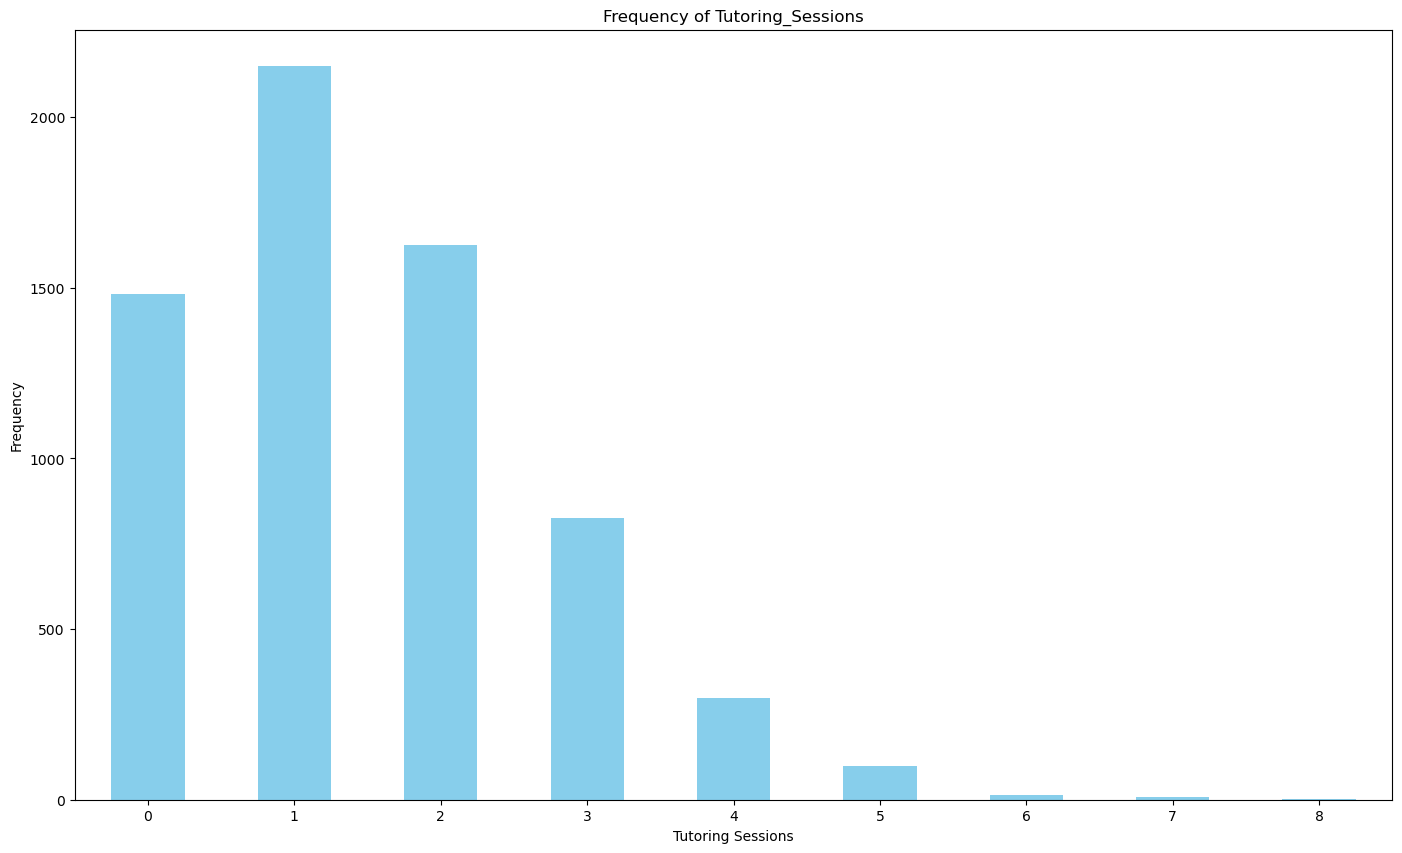

In [162]:
# Outliers for Tutoring Sessions

Q11 = 1
Q33 = 2
IQR2 = Q33 - Q11
print('\nInterquartile Range:', IQR2)

lower_bound1 = Q11 - 1.5 * IQR2
upper_bound1 = Q33 + 1.5 * IQR2

print('\nlower bound outliers:', lower_bound1)
print('upper bound outliers:', upper_bound1)

lowerboundoutliers1 = NewData[(NewData['Tutoring_Sessions'] < lower_bound1)]
upperboundoutliers1 = NewData[(NewData['Tutoring_Sessions'] > upper_bound1)]

print('\nCount of Lower Bound Outliers:', lowerboundoutliers1.shape[0])
print('Count of Upper Bound Outliers:', upperboundoutliers1.shape[0])

plt.figure(figsize=(8, 6))
sns.boxplot(y=NewData['Tutoring_Sessions'])
plt.axhline(lower_bound1, color='red', linestyle='--', label=f'Lower Bound ({lower_bound})')
plt.axhline(upper_bound1, color='green', linestyle='--', label=f'Upper Bound ({upper_bound})')
plt.title("Box Plot for Tutoring_Sessions ")
plt.ylabel("Tutoring_Sessions")
plt.legend()
plt.show()


score_counts = df_no_outliers['Tutoring_Sessions'].value_counts().sort_index()

plt.figure(figsize=(17, 10))
score_counts.plot(kind='bar', color='skyblue')
plt.title("Frequency of Tutoring_Sessions")
plt.xlabel("Tutoring Sessions")
plt.ylabel("Frequency")
plt.xticks(rotation=0)  
plt.show()

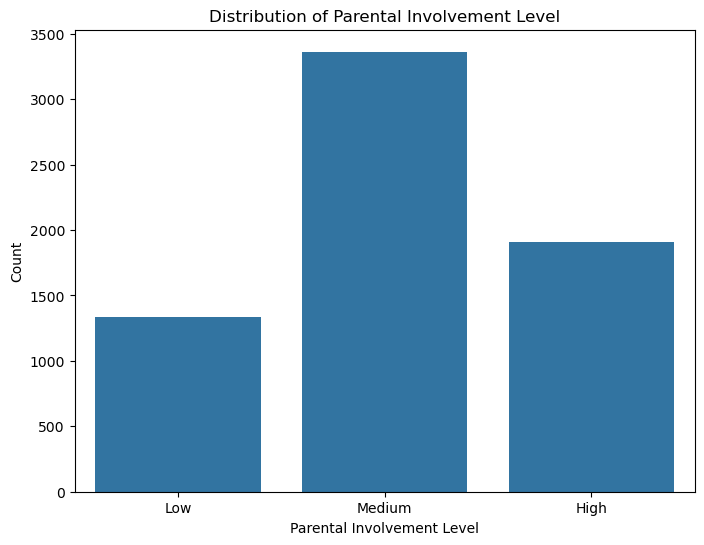

In [164]:
plt.figure(figsize=(8,6))
sns.countplot(x='Parental_Involvement', data=data)
plt.title('Distribution of Parental Involvement Level')
plt.xlabel('Parental Involvement Level')
plt.ylabel('Count')
plt.show()

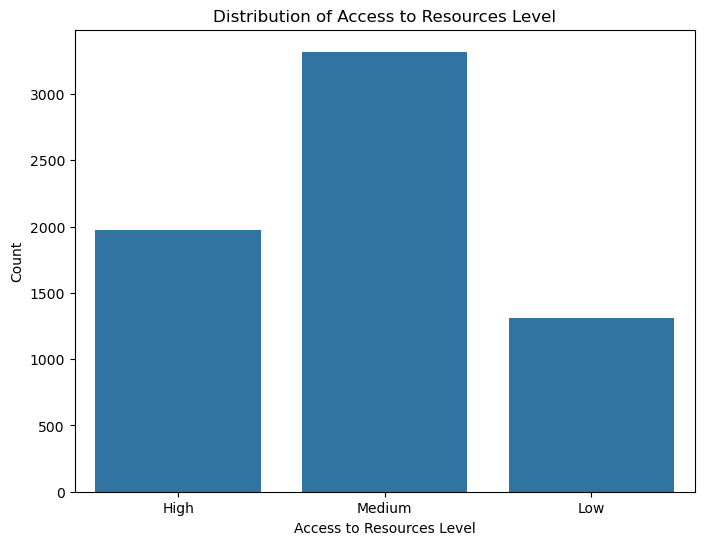

In [166]:
plt.figure(figsize=(8,6))
sns.countplot(x='Access_to_Resources', data=data)
plt.title('Distribution of Access to Resources Level')
plt.xlabel('Access to Resources Level')
plt.ylabel('Count')
plt.show()

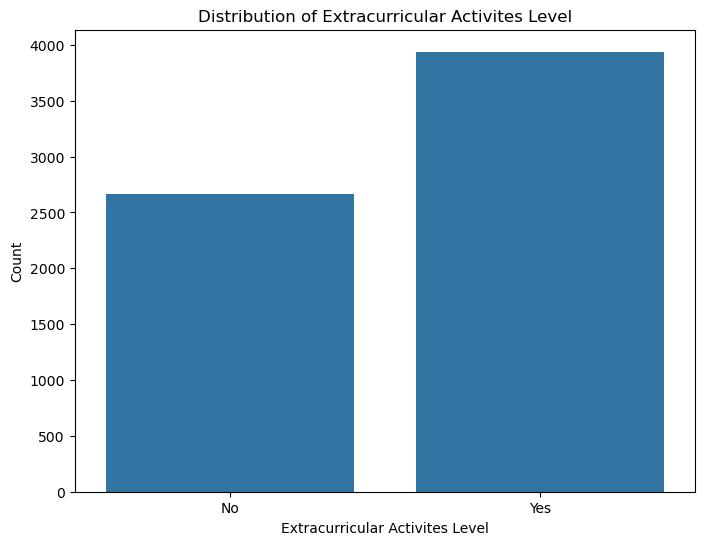

In [168]:
plt.figure(figsize=(8,6))
sns.countplot(x='Extracurricular_Activities', data=data)
plt.title('Distribution of Extracurricular Activites Level')
plt.xlabel('Extracurricular Activites Level')
plt.ylabel('Count')
plt.show()

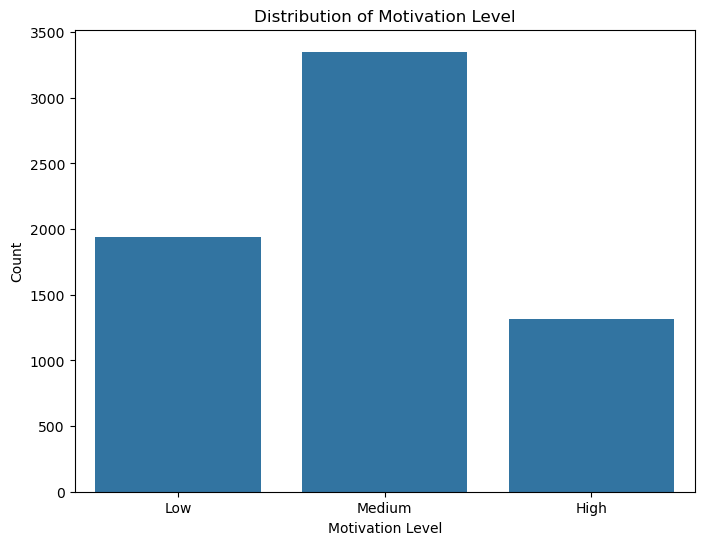

In [170]:
plt.figure(figsize=(8,6))
sns.countplot(x='Motivation_Level', data=data)
plt.title('Distribution of Motivation Level')
plt.xlabel('Motivation Level')
plt.ylabel('Count')
plt.show()

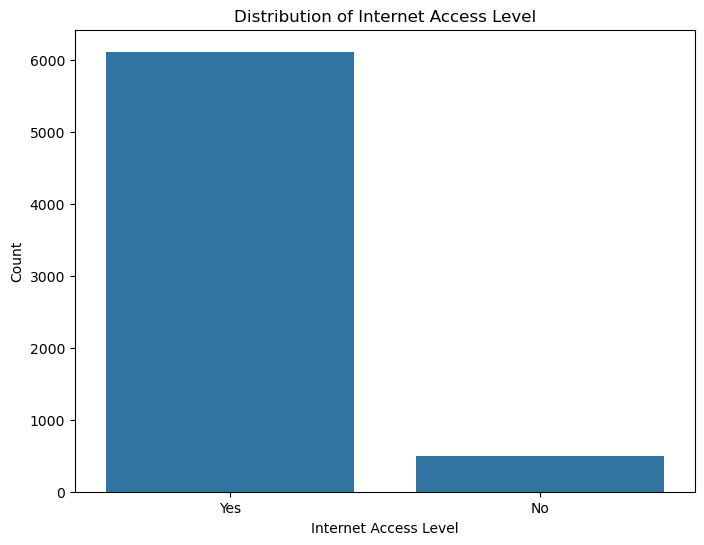

In [172]:
plt.figure(figsize=(8,6))
sns.countplot(x='Internet_Access', data=data)
plt.title('Distribution of Internet Access Level')
plt.xlabel('Internet Access Level')
plt.ylabel('Count')
plt.show()

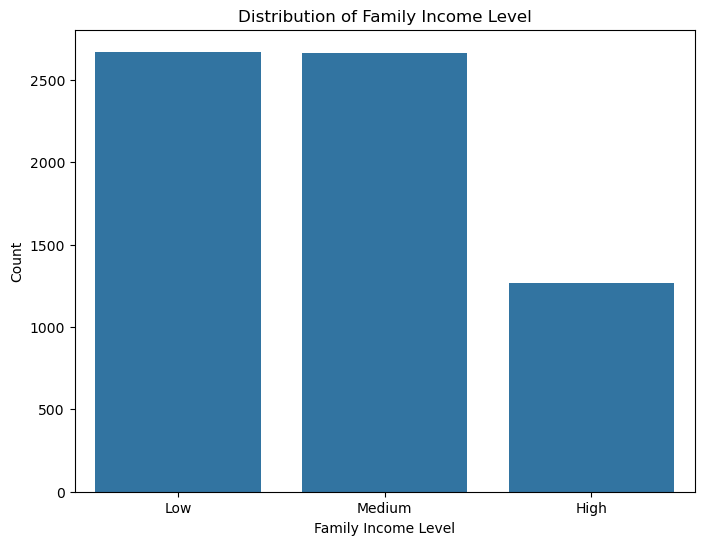

In [174]:
plt.figure(figsize=(8,6))
sns.countplot(x='Family_Income', data=data)
plt.title('Distribution of Family Income Level')
plt.xlabel('Family Income Level')
plt.ylabel('Count')
plt.show()

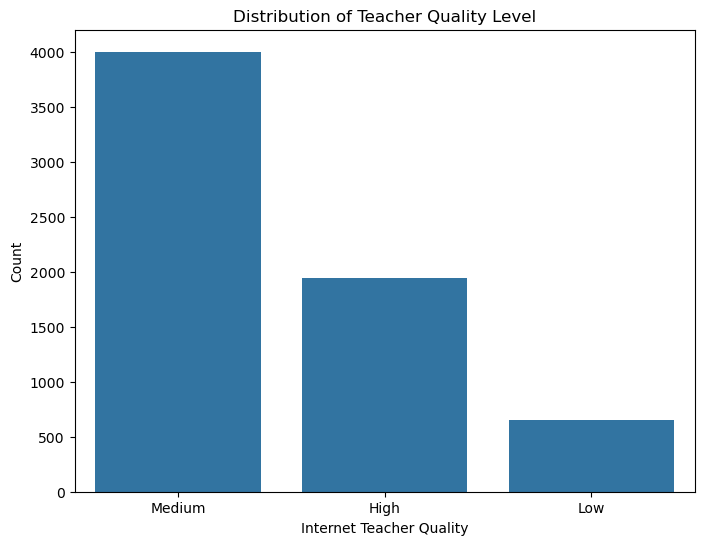

In [176]:
plt.figure(figsize=(8,6))
sns.countplot(x='Teacher_Quality', data=data)
plt.title('Distribution of Teacher Quality Level')
plt.xlabel('Internet Teacher Quality')
plt.ylabel('Count')
plt.show()

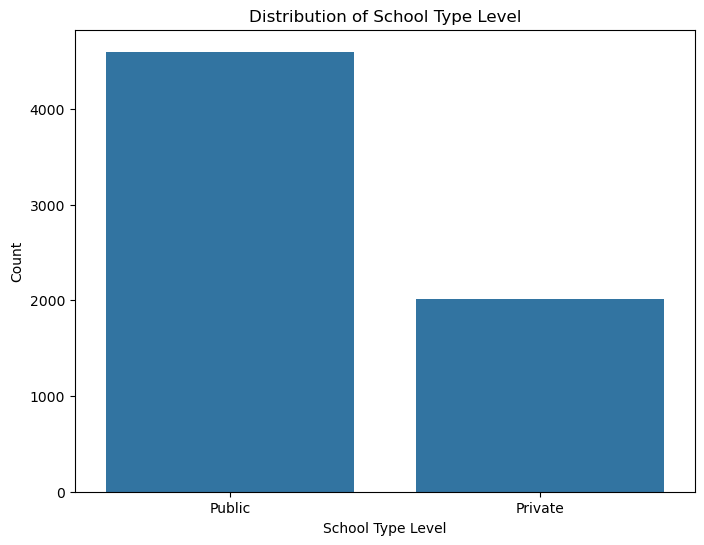

In [180]:
plt.figure(figsize=(8,6))
sns.countplot(x='School_Type', data=data)
plt.title('Distribution of School Type Level')
plt.xlabel('School Type Level')
plt.ylabel('Count')
plt.show()

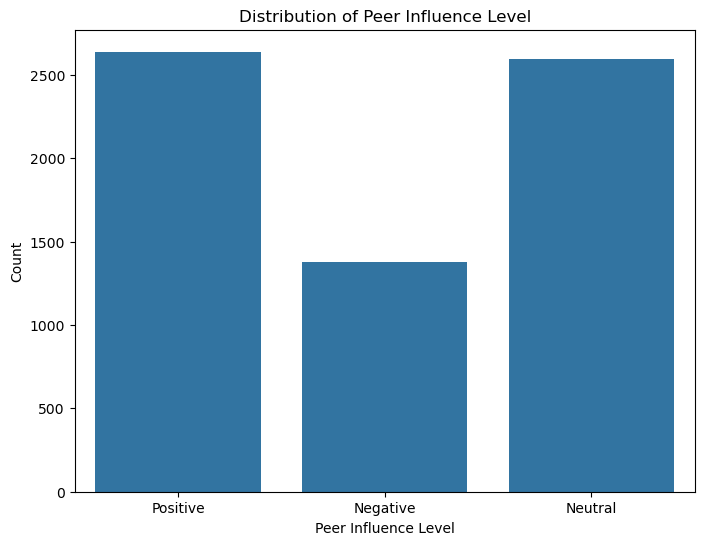

In [178]:
plt.figure(figsize=(8,6))
sns.countplot(x='Peer_Influence', data=data)
plt.title('Distribution of Peer Influence Level')
plt.xlabel('Peer Influence Level')
plt.ylabel('Count')
plt.show()

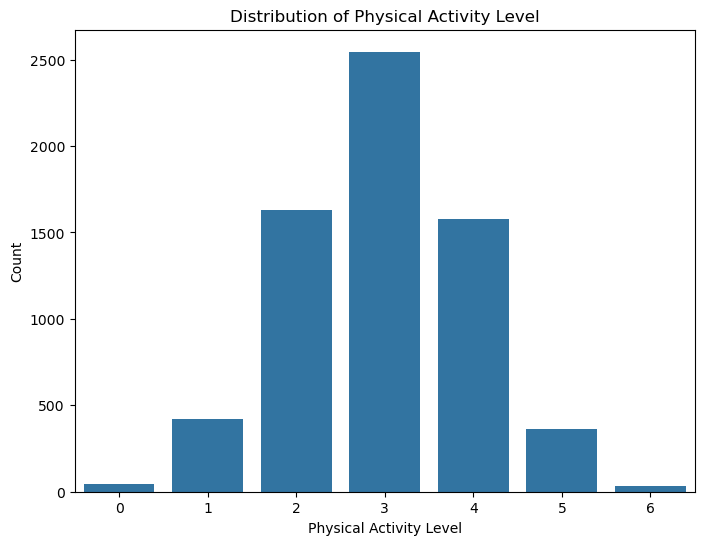

In [190]:
plt.figure(figsize=(8,6))
sns.countplot(x='Physical_Activity', data=data)
plt.title('Distribution of Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Count')
plt.show()

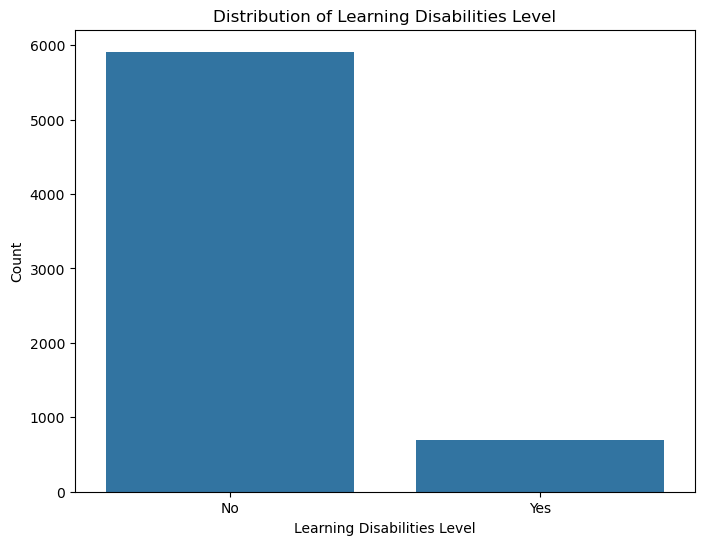

In [188]:
plt.figure(figsize=(8,6))
sns.countplot(x='Learning_Disabilities', data=data)
plt.title('Distribution of Learning Disabilities Level')
plt.xlabel('Learning Disabilities Level')
plt.ylabel('Count')
plt.show()

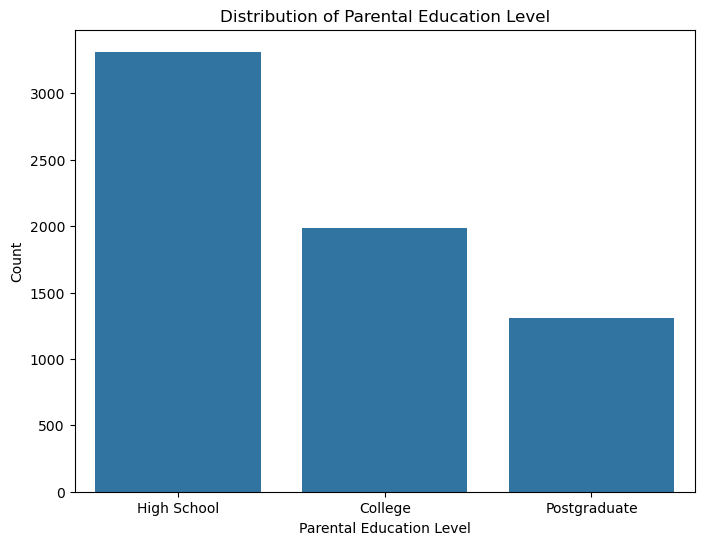

In [186]:
plt.figure(figsize=(8,6))
sns.countplot(x='Parental_Education_Level', data=data)
plt.title('Distribution of Parental Education Level')
plt.xlabel('Parental Education Level')
plt.ylabel('Count')
plt.show()

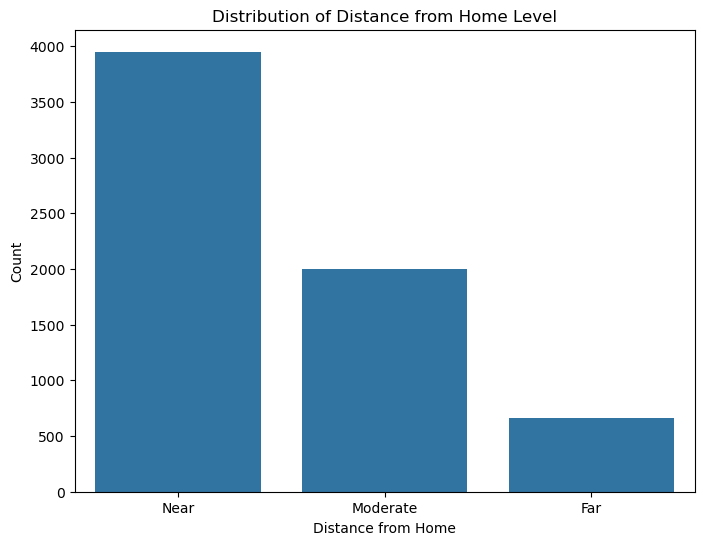

In [184]:
plt.figure(figsize=(8,6))
sns.countplot(x='Distance_from_Home', data=data)
plt.title('Distribution of Distance from Home Level')
plt.xlabel('Distance from Home')
plt.ylabel('Count')
plt.show()

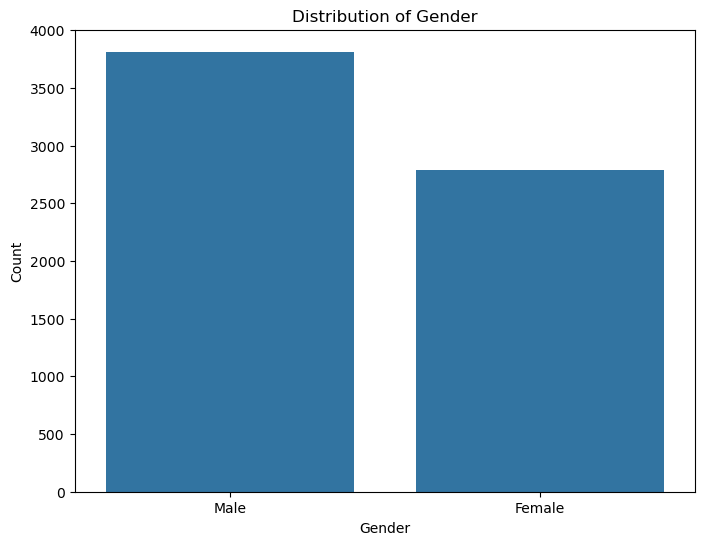

In [182]:
plt.figure(figsize=(8,6))
sns.countplot(x='Gender', data=data)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

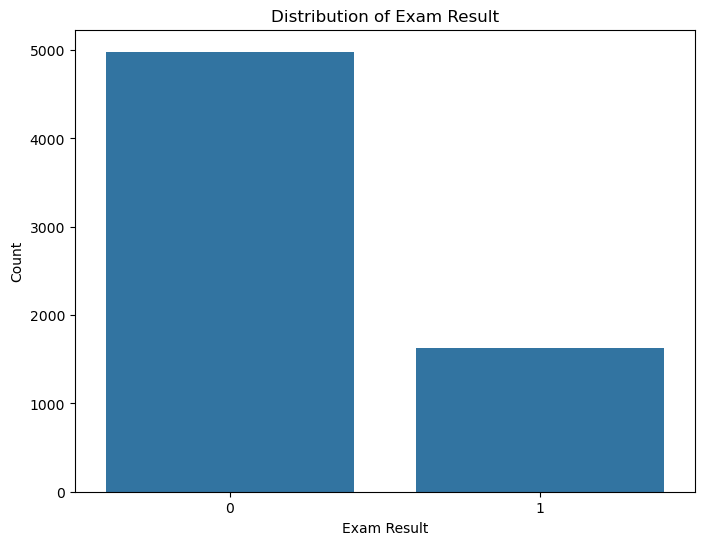

In [200]:
plt.figure(figsize=(8,6))
sns.countplot(x='Exam_Result', data=data)
plt.title('Distribution of Exam Result')
plt.xlabel('Exam Result')
plt.ylabel('Count')
plt.show()

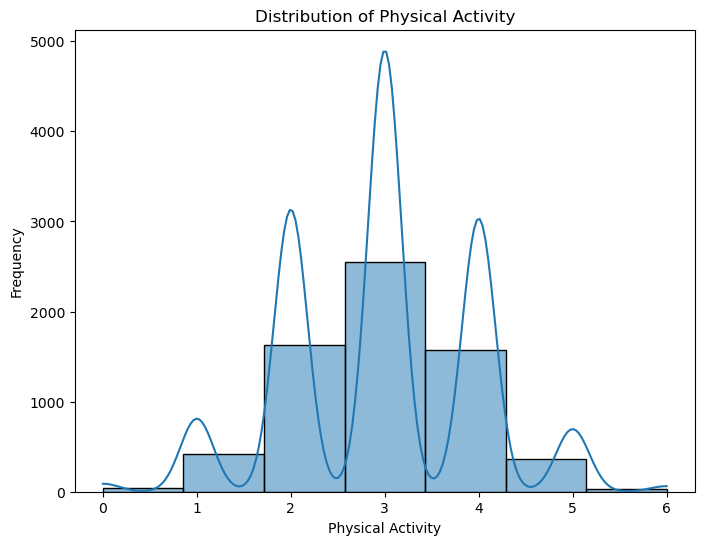

In [198]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Physical_Activity'], kde=True, bins=7) 
plt.title('Distribution of Physical Activity')
plt.xlabel('Physical Activity')
plt.ylabel('Frequency')
plt.show()

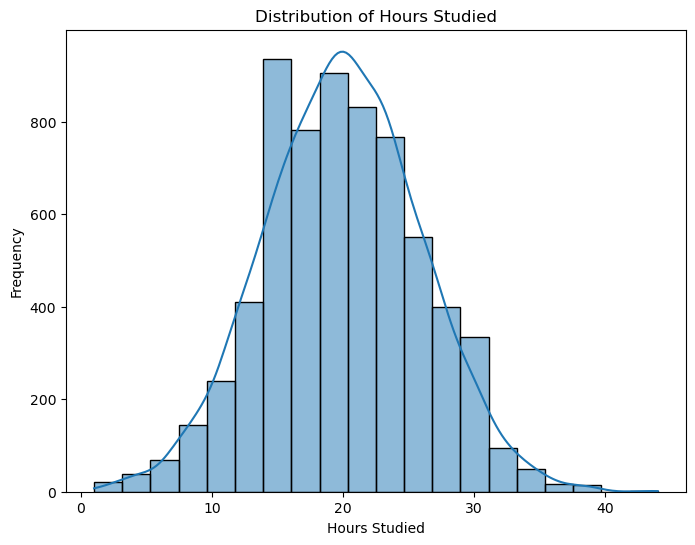

In [194]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Hours_Studied'], kde=True, bins=20) 
plt.title('Distribution of Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Frequency')
plt.show()

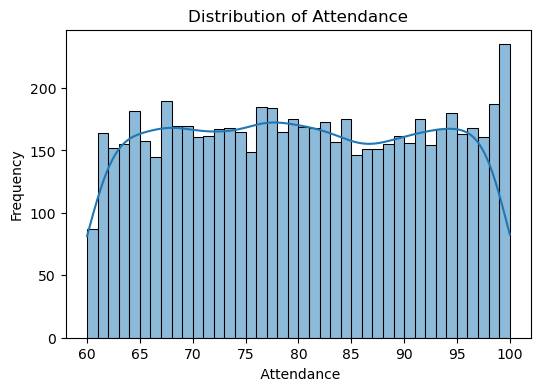

In [196]:
plt.figure(figsize=(6, 4))
sns.histplot(data['Attendance'], kde=True, bins=40) 
plt.title('Distribution of Attendance')
plt.xlabel(' Attendance')
plt.ylabel('Frequency')
plt.show()

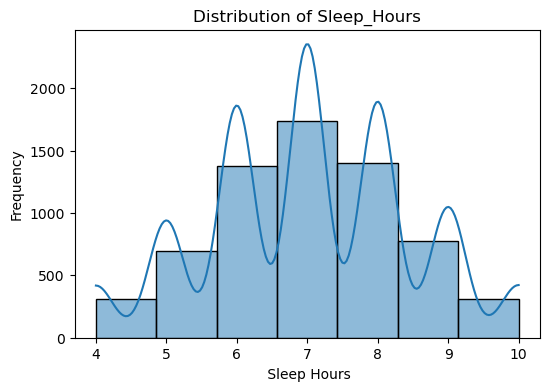

In [210]:
plt.figure(figsize=(6, 4))
sns.histplot(data['Sleep_Hours'], kde=True, bins=7) 
plt.title('Distribution of Sleep_Hours')
plt.xlabel(' Sleep Hours')
plt.ylabel('Frequency')
plt.show()

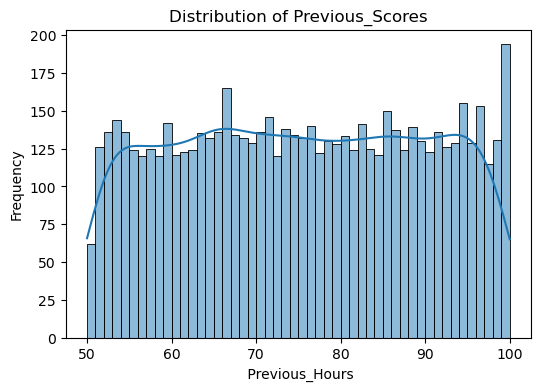

In [208]:
plt.figure(figsize=(6, 4))
sns.histplot(data['Previous_Scores'], kde=True, bins=50) 
plt.title('Distribution of Previous_Scores')
plt.xlabel(' Previous_Hours')
plt.ylabel('Frequency')
plt.show()

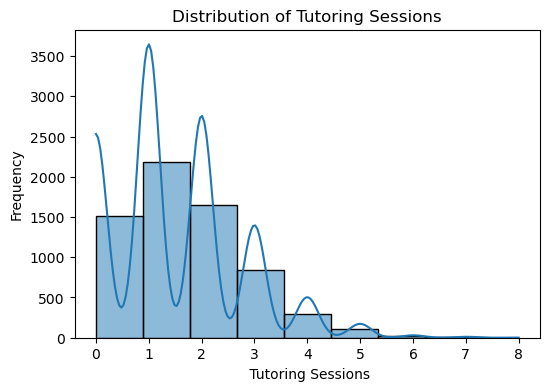

In [206]:
plt.figure(figsize=(6, 4))
sns.histplot(data['Tutoring_Sessions'], kde=True, bins=9) 
plt.title('Distribution of Tutoring Sessions')
plt.xlabel(' Tutoring Sessions')
plt.ylabel('Frequency')
plt.show()

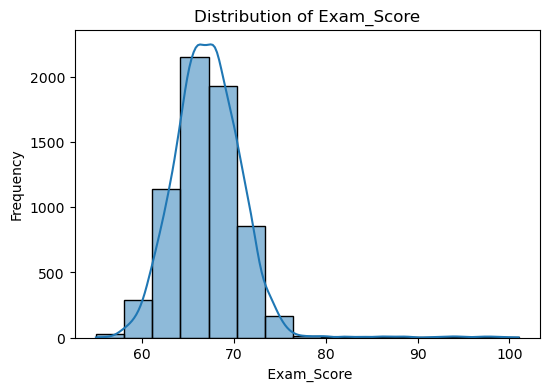

In [204]:
plt.figure(figsize=(6, 4))
sns.histplot(data['Exam_Score'], kde=True, bins=15) 
plt.title('Distribution of Exam_Score')
plt.xlabel(' Exam_Score')
plt.ylabel('Frequency')
plt.show()

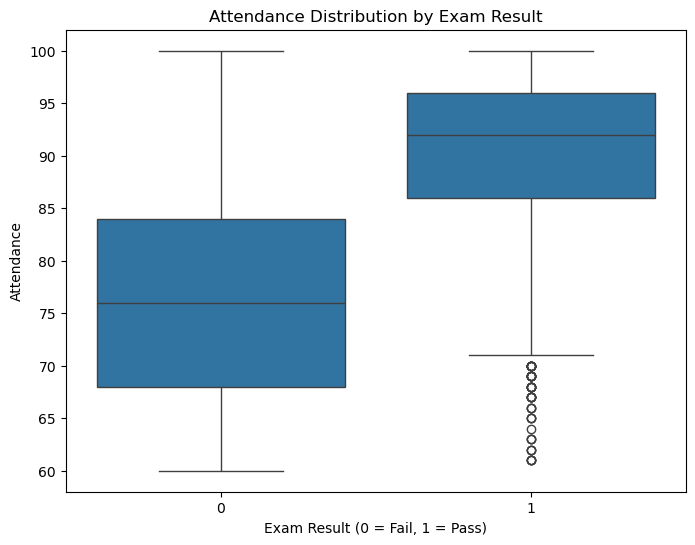

In [202]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exam_Result', y='Attendance', data=data)
plt.title('Attendance Distribution by Exam Result')
plt.xlabel('Exam Result (0 = Fail, 1 = Pass)')
plt.ylabel('Attendance')
plt.show()

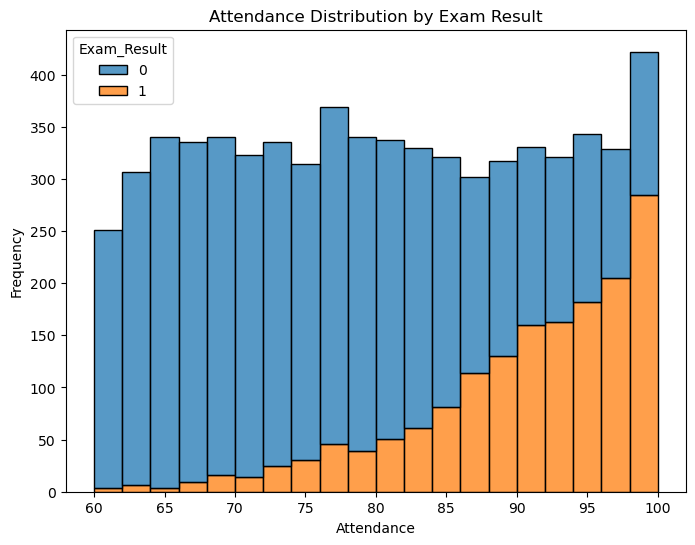

In [218]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Attendance', hue='Exam_Result', bins=20, kde=False, multiple='stack')
plt.title('Attendance Distribution by Exam Result')
plt.xlabel('Attendance')
plt.ylabel('Frequency')
plt.show()

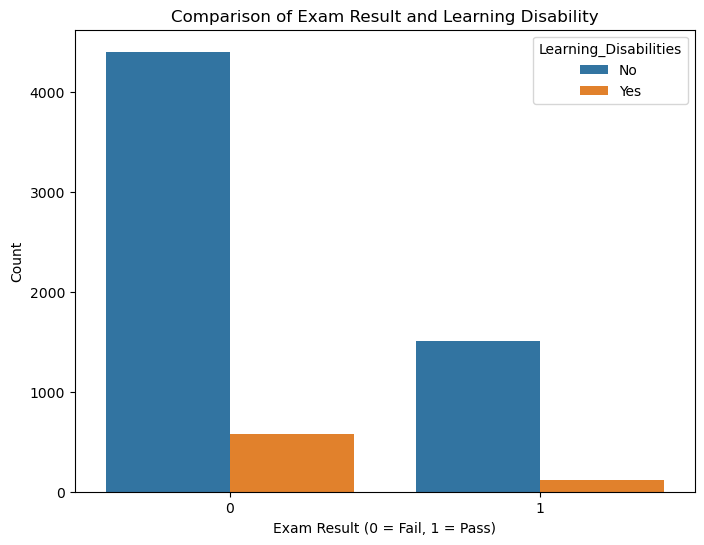

In [216]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Exam_Result', hue='Learning_Disabilities', data=data)
plt.title('Comparison of Exam Result and Learning Disability')
plt.xlabel('Exam Result (0 = Fail, 1 = Pass)')
plt.ylabel('Count')
plt.show()

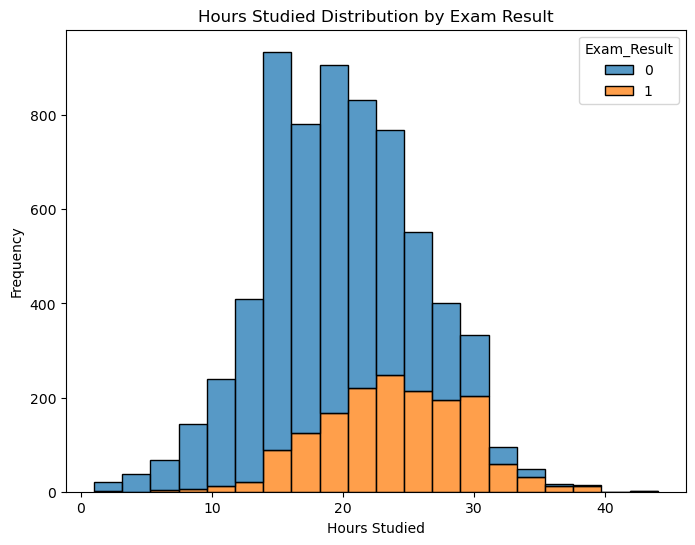

In [214]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Hours_Studied', hue='Exam_Result', bins=20, kde=False, multiple='stack')
plt.title('Hours Studied Distribution by Exam Result')
plt.xlabel('Hours Studied')
plt.ylabel('Frequency')
plt.show()

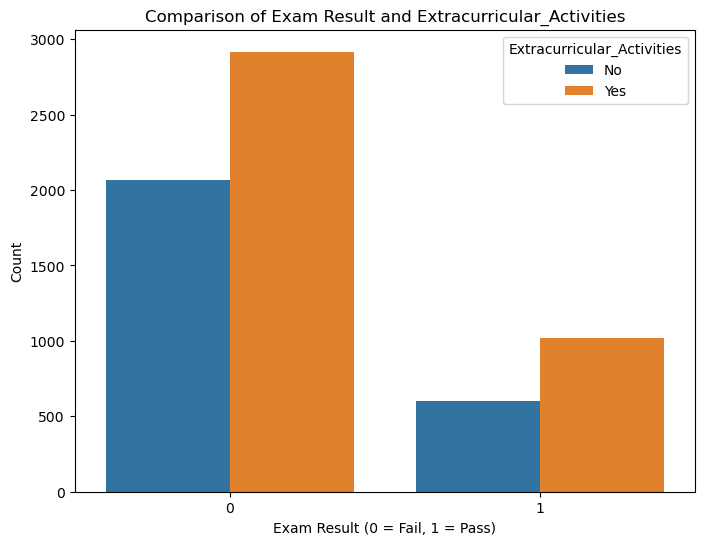

In [212]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Exam_Result', hue='Extracurricular_Activities', data=data)
plt.title('Comparison of Exam Result and Extracurricular_Activities')
plt.xlabel('Exam Result (0 = Fail, 1 = Pass)')
plt.ylabel('Count')
plt.show()

In [222]:
#Splitting Data

X = NewData1.drop(["Exam_Result"], axis = 1)
Y = NewData1["Exam_Result"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)


Training data size: (5285, 19)
Testing data size: (1322, 19)


In [224]:
#Logistic Regression

label_encoder = LabelEncoder()

Y_train_encoded = label_encoder.fit_transform(Y_train) 
Y_test_encoded = label_encoder.transform(Y_test)  


Logistic_model = LogisticRegression(penalty="l2", C=1e42, solver="liblinear")

Logistic_model.fit(X_train, Y_train_encoded)

y_pred = Logistic_model.predict(X_test)


print("Intercept:", Logistic_model.intercept_[0])
print(pd.DataFrame({"Coeff": Logistic_model.coef_[0]}, index=X_train.columns).transpose())


f1 = f1_score(Y_test_encoded, y_pred)

# Print the F1 score
print(f"F1 Score: {f1}")

Intercept: -85.92645253986966
       Learning_Disabilities_num  Extracurricular_Activities_num  \
Coeff                  -1.870518                        1.123078   

       School_Type_num  Access_to_Resources_num  Motivation_Level_num  \
Coeff        -0.151457                 2.262774              1.215381   

       Internet_Access_num  Family_Income_num  Teacher_Quality_num  \
Coeff             2.076517           1.094371             1.191339   

       Peer_Influence_num  Parental_Education_Level_num  \
Coeff            1.201042                      1.119154   

       Distance_from_Home_num  Gender_Level_num  Parental_Involv_num  \
Coeff               -1.169161          0.000385             2.152838   

       Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
Coeff       0.674318    0.444213     0.046295          0.10789   

       Tutoring_Sessions  Physical_Activity  
Coeff           1.086278             0.4763  
F1 Score: 0.9722627737226277


In [226]:
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)


Logistic_model = LogisticRegression(penalty="l2", C=1e42, solver="liblinear")


Logistic_model.fit(X_train, Y_train_encoded)


y_pred = Logistic_model.predict(X_test)


print("Intercept:", Logistic_model.intercept_[0])
print(pd.DataFrame({"Coeff": Logistic_model.coef_[0]}, index=X_train.columns).transpose())

# F1 score for the training set
y_train_pred = Logistic_model.predict(X_train)
f1_train = f1_score(Y_train_encoded, y_train_pred)
print(f"F1 Score (Training Set): {f1_train}")


#F1 score for the test set
f1_test = f1_score(Y_test_encoded, y_pred)
print(f"F1 Score (Test Set): {f1_test}")

print("Testing data size:", X_test.shape)

# Confusion matrix for the training set
cm_train = confusion_matrix(Y_train_encoded, y_train_pred)

# Confusion matrix for the test set
cm_test = confusion_matrix(Y_test_encoded, y_pred)


print("\nConfusion Matrix (Training Set):")
print(cm_train)
print(f"F1 Score (Training Set): {f1_train}")

print("\nConfusion Matrix (Test Set):")
print(cm_test)
print(f"F1 Score (Test Set): {f1_test}")

Intercept: -85.92645253986966
       Learning_Disabilities_num  Extracurricular_Activities_num  \
Coeff                  -1.870518                        1.123078   

       School_Type_num  Access_to_Resources_num  Motivation_Level_num  \
Coeff        -0.151457                 2.262774              1.215381   

       Internet_Access_num  Family_Income_num  Teacher_Quality_num  \
Coeff             2.076517           1.094371             1.191339   

       Peer_Influence_num  Parental_Education_Level_num  \
Coeff            1.201042                      1.119154   

       Distance_from_Home_num  Gender_Level_num  Parental_Involv_num  \
Coeff               -1.169161          0.000385             2.152838   

       Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
Coeff       0.674318    0.444213     0.046295          0.10789   

       Tutoring_Sessions  Physical_Activity  
Coeff           1.086278             0.4763  
F1 Score (Training Set): 0.965571824297586
F1 Score (Tes

In [228]:
coeff_df = pd.DataFrame({
    "Coefficient": Logistic_model.coef_[0],
    "Feature": X_train.columns
})

coeff_df = coeff_df.sort_values(by="Coefficient", ascending=False)

print("Logistic Regression Coefficients:")
print(coeff_df.to_string(index=False, float_format="%.4f"))


Logistic Regression Coefficients:
 Coefficient                        Feature
      2.2628        Access_to_Resources_num
      2.1528            Parental_Involv_num
      2.0765            Internet_Access_num
      1.2154           Motivation_Level_num
      1.2010             Peer_Influence_num
      1.1913            Teacher_Quality_num
      1.1231 Extracurricular_Activities_num
      1.1192   Parental_Education_Level_num
      1.0944              Family_Income_num
      1.0863              Tutoring_Sessions
      0.6743                  Hours_Studied
      0.4763              Physical_Activity
      0.4442                     Attendance
      0.1079                Previous_Scores
      0.0463                    Sleep_Hours
      0.0004               Gender_Level_num
     -0.1515                School_Type_num
     -1.1692         Distance_from_Home_num
     -1.8705      Learning_Disabilities_num


In [230]:
#Support Vector Machine

label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

svm_model = svm.SVC(random_state=1)
svm_model.fit(X_train, Y_train_encoded)
svm_train_pred = svm_model.predict(X_train)
svm_test_pred = svm_model.predict(X_test)


# Confusion Matrix training set
svm_train_cm = confusion_matrix(Y_train_encoded, svm_train_pred)
print("Confusion Matrix (Training Set):")
print(svm_train_cm)

# Confusion Matrix test set
svm_test_cm = confusion_matrix(Y_test_encoded, svm_test_pred)
print("\nConfusion Matrix (Test Set):")
print(svm_test_cm)

# F1 Score  training set
svm_train_f1 = f1_score(Y_train_encoded, svm_train_pred)
print("\nF1 Score (Training Set):", svm_train_f1)

# F1 Score  test set
svm_test_f1 = f1_score(Y_test_encoded, svm_test_pred)
print("F1 Score (Test Set):", svm_test_f1)


Confusion Matrix (Training Set):
[[3813  194]
 [ 371  907]]

Confusion Matrix (Test Set):
[[932  43]
 [ 94 253]]

F1 Score (Training Set): 0.762505254308533
F1 Score (Test Set): 0.7869362363919129


In [232]:
#SVM LINEAR MODEL

label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

# Create and train the SVM model (Linear)
svm_linear_model = SVC(kernel='linear', random_state=1)
svm_linear_model.fit(X_train, Y_train_encoded)

# Predict on the training set
svm_linear_train_pred = svm_linear_model.predict(X_train)

# F1 Score for the training set
train_f1_score = f1_score(Y_train_encoded, svm_linear_train_pred, average='binary', pos_label=1)
print("SVM Linear- F1 Score (Training Set):", train_f1_score)

# Predict on the test set
svm_linear_test_pred = svm_linear_model.predict(X_test)

# F1 Score for the test set
test_f1_score = f1_score(Y_test_encoded, svm_linear_test_pred, average='binary', pos_label=1)
print("SVM Linear- F1 Score ( Test Set):", test_f1_score)

SVM Linear- F1 Score (Training Set): 0.9643423137876387
SVM Linear- F1 Score ( Test Set): 0.9694323144104804


In [234]:
#SVM SIGMOID MODEL

label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

# Create and train the SVM model (Linear)
svm_sigmoid_model = SVC(kernel='sigmoid', random_state=1)
svm_sigmoid_model.fit(X_train, Y_train_encoded)

# Predict on the training set
svm_sigmoid_train_pred = svm_sigmoid_model.predict(X_train)

# F1 Score for the training set
train_f1_score1 = f1_score(Y_train_encoded, svm_sigmoid_train_pred, average='binary', pos_label=1)
print("SVM Sigmoid - F1 Score (Training Set):", train_f1_score1)

# Predict on the test set
svm_sigmoid_test_pred = svm_sigmoid_model.predict(X_test)

# F1 Score for the test set
test_f1_score1 = f1_score(Y_test_encoded, svm_sigmoid_test_pred, average='binary', pos_label=1)
print("SVM Sigmoid - F1 Score (Test Set):", test_f1_score1)

SVM Sigmoid - F1 Score (Training Set): 0.02813405047579644
SVM Sigmoid - F1 Score (Test Set): 0.02247191011235955


In [236]:
#SVM POLY MODEL

label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

# Create and train the SVM model (Linear)
svm_poly_model = SVC(kernel='poly', random_state=1)
svm_poly_model.fit(X_train, Y_train_encoded)

# Predict on the training set
svm_poly_train_pred = svm_poly_model.predict(X_train)

# F1 Score for the training set
train_f1_score2 = f1_score(Y_train_encoded, svm_poly_train_pred, average='binary', pos_label=1)
print("SVM POLY - F1 Score (Training Set):", train_f1_score2)

# Predict on the test set
svm_poly_test_pred = svm_poly_model.predict(X_test)

# F1 Score for the test set
test_f1_score2 = f1_score(Y_test_encoded, svm_poly_test_pred, average='binary', pos_label=1)
print("SVM POLY - F1 Score (Test Set):", test_f1_score2)

SVM POLY - F1 Score (Training Set): 0.8016701461377871
SVM POLY - F1 Score (Test Set): 0.8300153139356815
